In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest




In [16]:
#read the file
df=pd.read_csv('/Users/shrutiparulekar/Desktop/A:B testing project /ab_test.csv')

In [17]:
df.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [18]:
countries=pd.read_csv('/Users/shrutiparulekar/Desktop/A:B testing project /countries_ab.csv')

In [19]:
countries.head()

,id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [20]:
#Rows and columns in df_behavior
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 294478, Columns: 5


In [21]:
#Rows and columns in countries
print(f"Rows: {countries.shape[0]}, Columns: {countries.shape[1]}")


Rows: 290584, Columns: 2


In df_behavior 3894 rows are more than countries

In [22]:
#checking null values in df
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         294478 non-null  int64 
 1   time       294478 non-null  object
 2   con_treat  294478 non-null  object
 3   page       294478 non-null  object
 4   converted  294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None
id           0
time         0
con_treat    0
page         0
converted    0
dtype: int64


In [23]:
#checking null values in countries 
print(countries.info())
print(countries.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       290584 non-null  int64 
 1   country  290584 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB
None
id         0
country    0
dtype: int64


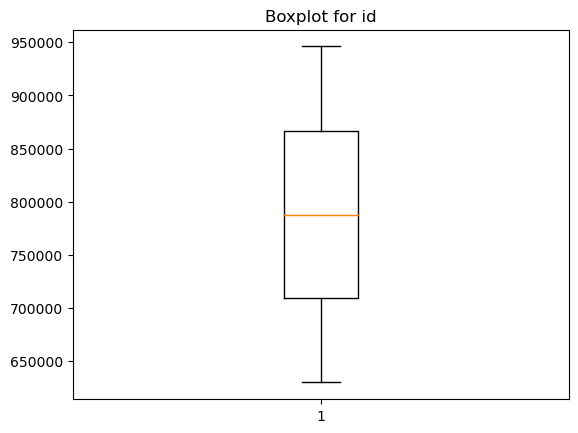

In [24]:
#checking for outliers
plt.boxplot(df['id'])
plt.title('Boxplot for id')
plt.show()


(array([259241.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,  35237.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

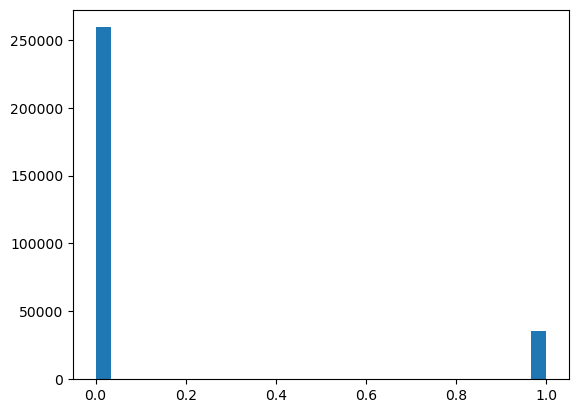

In [25]:
#Checking for the distribution
plt.hist(df['converted'], bins=30)


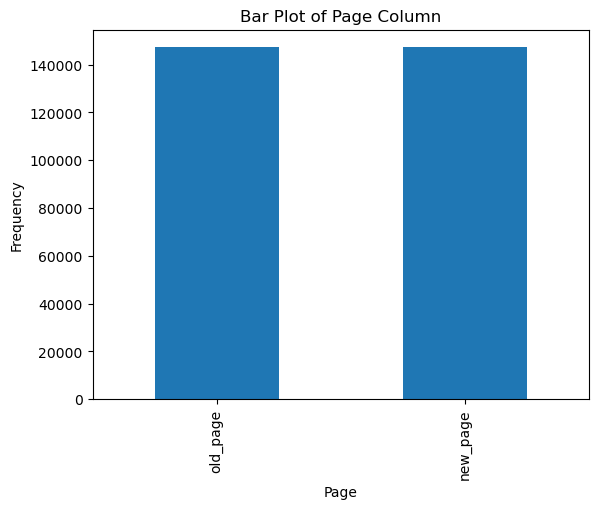

In [26]:
df['page'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Page Column')
plt.xlabel('Page')
plt.ylabel('Frequency')
plt.show()


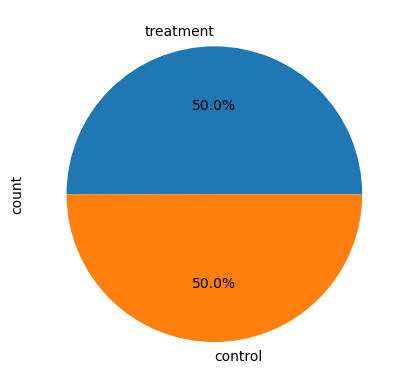

In [27]:
df['con_treat'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

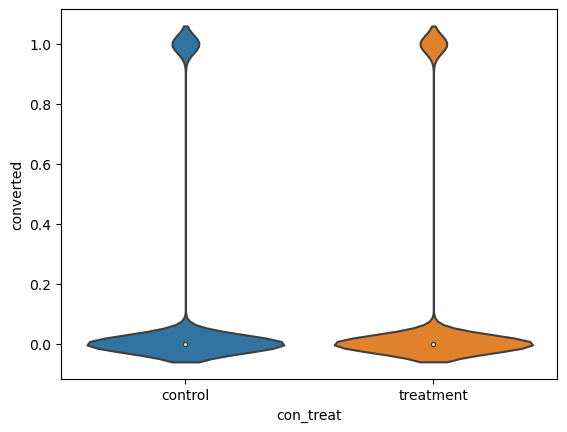

In [64]:
#check the distribution of the categorical and numerical variables
import seaborn as sns
sns.violinplot(x='con_treat', y='converted', data=df)
plt.show()

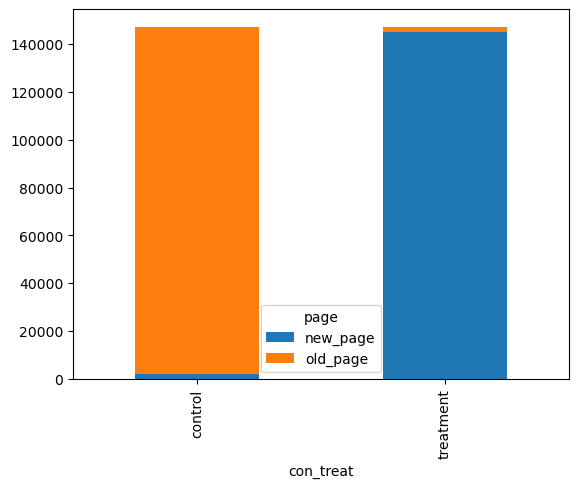

In [29]:
pd.crosstab(df['con_treat'], df['page']).plot(kind='bar', stacked=True)
plt.show()

Doing automatic Pandas Profiling

In [30]:
from ydata_profiling import ProfileReport

# Generate the data profiling report 
report = ProfileReport(df, title='My Data')
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Starting Data Analysis

In [31]:
df_new=pd.merge(df,countries,on='id')

In [32]:
#check if there are any nulls or duplicates in the new dataset
df_new.isnull().sum()


id           0
time         0
con_treat    0
page         0
converted    0
country      0
dtype: int64

In [33]:
print(df_new.duplicated().sum())

0


In [34]:
#Rename some column names
df_cleaned = df_new.rename(columns={'con_treat':'control_group','page':'page_version'})

In [35]:
df_cleaned

,id,time,control_group,page_version,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US
...,...,...,...,...,...,...
294473,751197,28:38.6,control,old_page,0,US
294474,945152,51:57.1,control,old_page,0,US
294475,734608,45:03.4,control,old_page,0,US
294476,697314,20:29.0,control,old_page,0,US


In [36]:
# Split the values in the 'time' column

time_components = df_cleaned['time'].str.split(':', n=1, expand=True)
minutes = time_components[0].astype(int)
seconds = time_components[1].astype(float)

# Calculate the total number of seconds and minutes
minutes_in_seconds = minutes * 60
total_minutes = minutes + seconds / 60

# Update column "time" with correct values
df_cleaned['time'] = total_minutes

In [37]:
df_cleaned

,id,time,control_group,page_version,converted,country
0,851104,11.810000,control,old_page,0,US
1,804228,1.753333,control,old_page,0,US
2,661590,55.103333,treatment,new_page,0,US
3,853541,28.051667,treatment,new_page,0,US
4,864975,52.436667,control,old_page,1,US
...,...,...,...,...,...,...
294473,751197,28.643333,control,old_page,0,US
294474,945152,51.951667,control,old_page,0,US
294475,734608,45.056667,control,old_page,0,US
294476,697314,20.483333,control,old_page,0,US


In [38]:
#Count treatment values 
treatment_count=df_cleaned[df_cleaned['control_group']=='treatment'].shape[0]

#count the new page values 
new_page_count=df_cleaned[df_cleaned['page_version']=='new_page'].shape[0]

In [39]:
if treatment_count==new_page_count:
    print("Counts are equal")
else:
    print('Counts are not equal')

Counts are not equal


In [40]:
# Filter the DataFrame to keep only the rows where treatment matches new_page
df_filtered=df_cleaned[(df_cleaned['control_group']=='treatment')&(df_cleaned['page_version']=='new_page')]

#Combine the releavnt tratement and control groups

df_filtered = pd.concat([df_filtered, df_cleaned[(df_cleaned['control_group'] == 'control') & (df_cleaned['page_version'] == 'old_page')]])


In [41]:
df_filtered['control_group'].value_counts()

control_group
treatment    145311
control      145274
Name: count, dtype: int64

Now check if the treatment matches with the new page and control matches with the old page 

In [42]:
#Count treatment values 
treatment_count=df_filtered[df_filtered['control_group']=='treatment'].shape[0]

#count the new page values 
new_page_count=df_filtered[df_filtered['page_version']=='new_page'].shape[0]

if treatment_count==new_page_count:
    print("Counts are equal")
else:
    print('Counts are not equal')

Counts are equal


In [43]:
#Count Control values 
control_count=df_filtered[df_filtered['control_group']=='control'].shape[0]

#count the new page values 
old_page_count=df_filtered[df_filtered['page_version']=='old_page'].shape[0]

if control_count==old_page_count:
    print("Counts are equal")
else:
    print('Counts are not equal')

Counts are equal


We have filtered the appropriate columns according to the Control and treatment groups 

In [46]:
df_filtered

,id,time,control_group,page_version,converted,country
2,661590,55.103333,treatment,new_page,0,US
3,853541,28.051667,treatment,new_page,0,US
6,679687,26.781667,treatment,new_page,1,CA
8,817355,58.150000,treatment,new_page,1,UK
9,839785,11.110000,treatment,new_page,1,CA
...,...,...,...,...,...,...
294471,718310,44.340000,control,old_page,0,US
294473,751197,28.643333,control,old_page,0,US
294474,945152,51.951667,control,old_page,0,US
294475,734608,45.056667,control,old_page,0,US


Begin Data Analysis


Calculating the conversion rates for each page 

In [47]:
# Count conversions for old_page
old_page_conversions = df_filtered[df_filtered['page_version'] == 'old_page']['converted'].count()

# Count conversions for new_page
new_page_conversions = df_filtered[df_filtered['page_version'] == 'new_page']['converted'].count()

print("Old Page Conversions:", old_page_conversions)
print("New Page Conversions:", new_page_conversions)

Old Page Conversions: 145274
New Page Conversions: 145311


In [52]:
# Count conversion rate for pages
conversion_by_page = df_filtered.groupby('page_version')['converted'].mean()
print(conversion_by_page)

page_version
new_page    0.118807
old_page    0.120386
Name: converted, dtype: float64


In [54]:
# Count conversion rate by countries
conversion_by_country = df_filtered.groupby('country')['converted'].mean()
print(conversion_by_country)

country
CA    0.115318
UK    0.120594
US    0.119546
Name: converted, dtype: float64


In [55]:
# count average time by pages
avg_time_by_page = df_filtered.groupby('page_version')['time'].mean()
print(avg_time_by_page)

page_version
new_page    30.025384
old_page    30.082096
Name: time, dtype: float64


In [58]:
# count average time by pages for converted users
converted_avg_time_by_page = df_filtered[df_filtered['converted'] == 1].groupby('page_version')['time'].mean()
print(converted_avg_time_by_page)

page_version
new_page    30.070836
old_page    29.954171
Name: time, dtype: float64


Hypotheses:

Null Hypothesis (H0): The conversion rate of the old page is equal to or higher than the conversion rate of the new page.

Alternative Hypothesis (H1): The conversion rate of the new page is higher than the conversion rate of the old page.

In [63]:
# Calculate conversion and sample size for a/b test
conversion_rate_control = df_filtered[df_filtered['page_version'] == 'old_page']['converted'].mean()
conversion_rate_treatment = df_filtered[df_filtered['page_version'] == 'new_page']['converted'].mean()

control_sample_size = df_filtered[df_filtered['page_version'] == 'old_page'].shape[0]
treatment_sample_size = df_filtered[df_filtered['page_version'] == 'new_page'].shape[0]

# Perform z-test
counts = [conversion_rate_control * control_sample_size, conversion_rate_treatment * treatment_sample_size]
nobs = [control_sample_size, treatment_sample_size]
stat, p_value = proportions_ztest(counts, nobs)

print(f"Z-score: {stat}")
print(f"P-value: {p_value}")

Z-score: 1.3116075339133115
P-value: 0.18965258971881804


Result of the experiment¶
We got Z-score: 1.3683 and P-value: 0.1712.

Meaning of the numbers
It means that the observed difference in conversion rates between the control and treatment groups is not statistically significant at the 95% significance level, as long as P-value more than 0.05.

The Z-score of 1.31 indicates that the observed difference in conversion rates falls within 1.368 standard deviations from the mean. Although it is a positive value, it does not provide strong evidence of a significant difference.

Conclusion of the experiment
All in all, there is not enough evidence to conclude a significant difference in conversion rates between the old and new web page versions.

Should a new version of the page be implemented?¶

All in all, it doesn't make sense to change the old design, at least for this new version. There's also no need to extend the experiment unless the results change dramatically. In order to think about replacing the old version of the page, more information is needed with other metrics such as user reviews, average revenue per user (ARPU), Click-Through Rate (CTR).